In [ ]:
import os
import sys
from pathlib import Path
from datetime import date
from typing import Optional, List, Dict, Any, Literal
from IPython.display import Image, display
from pydantic import BaseModel, Field, field_validator
from pathlib import Path
from dotenv import load_dotenv
from langgraph.graph import StateGraph, END, START
import polars as pl
from langchain_azure_ai.chat_models import AzureChatOpenAI, AzureAIChatCompletionsModel
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage

from pydantic import ConfigDict

sys.path.append(str(Path.cwd().parent))
# from prompts.prompt_builder import (
#     orchestrator_prompt,
#     table_mapping_prompt,
#     code_generation_prompt,
# )
# from config.data_catalog import DATA_DICTIONARY, TABLE_DESCRIPTIONS, JOIN_RELATIONSHIPS

load_dotenv(verbose=True)


True

In [ ]:
from docxtpl import DocxTemplate, RichText
from docx2pdf import convert
doc = DocxTemplate(
    r"D:\OneDrive - Students RWTH Aachen University\1_CV\New folder\SajjalaSreekarReddy_CV_template.docx"
)

# LinkedIn hyperlink
linkedin_rt = RichText()
linkedin_rt.add(
    "linkedin.com/in/sreekar2858",
    url_id=doc.build_url_id("https://linkedin.com/in/sreekar2858"),
    italic=True,
)

# Email hyperlink
email_rt = RichText()
email_rt.add(
    "sreekar2858@gmail.com",
    url_id=doc.build_url_id("mailto:sreekar2858@gmail.com"),
    italic=True,
)

context = {
    "name": "Sreekar Reddy Sajjala",
    "linkedin_link": linkedin_rt,
    "email": email_rt,
}

doc.render(context)
docx_path = r"D:\OneDrive - Students RWTH Aachen University\1_CV\New folder\SajjalaSreekarReddy_CV_filled.docx"
pdf_path = r"D:\OneDrive - Students RWTH Aachen University\1_CV\New folder\SajjalaSreekarReddy_CV_filled.pdf"

doc.save(docx_path)
convert(docx_path, pdf_path)


In [ ]:
# ============================================================================
# CV DATA MODELS
# ============================================================================

class BasicInfo(BaseModel):
    """Personal information section."""

    name: str
    description: str
    Address: str
    email: str
    linkedin_link: str
    portfolio_link: str

class DHLPoint(BaseModel):
    """DHL Experience Points"""

    DHL_point1: str
    DHL_point2: str
    DHL_point3: str

class SEPoint(BaseModel):
    """Siemens Energy Experience Points"""

    SE_point1: str
    SE_point2: str
    SE_point3: str

class RWTHPoint(BaseModel):
    """RWTH Aachen University Experience Points"""

    RWTH_Point1: str
    RWTH_Point2: str
    RWTH_Point3: str

class VolocopterPoint(BaseModel):
    """Volocopter Experience Points"""

    Volocopter_Point1: str
    Volocopter_Point2: str
    Volocopter_Point3: str

class DAPPoint(BaseModel):
    """DAP Experience Points"""

    DAP_Point1: str
    DAP_Point2: str
    DAP_Point3: str

class Skill(BaseModel):
    """Skill category."""

    skills_design_sim: str
    skills_prog_lang: str
    skills_libr_fw: str

class Publications(BaseModel):
    """Publications section."""

    pub1: str
    pub2: str

class Education(BaseModel):
    """Education section."""
    uni: str
    course: str

class Languages(BaseModel):
    """Languages section."""
    lang1: str
    lang1_lvl: str
    lang2: str
    lang2_lvl: str

# ============================================================================
# STATE OUTPUTS - UPDATED
# ============================================================================


class LoadCVDataOutput(BaseModel):
    """
    Loads CV data from various sources (database, file uploads, previous versions).
    Manages templates and user profile information.
    """

    model_config = ConfigDict(arbitrary_types_allowed=True)

    user_request: str = Field(..., description="The user's CV generation request")
    user_profile: Optional[Dict[str, Any]] = Field(
        default=None,
        description="User's stored profile data (basic info, preferences, history)",
    )

    # UPDATED: Properly typed CV sections with nested models
    basic_info: Optional[BasicInfo] = Field(
        default=None, description="Personal information section"
    )
    dhl_points: Optional[DHLPoint] = Field(
        default=None, description="DHL experience points"
    )
    se_points: Optional[SEPoint] = Field(
        default=None, description="Siemens Energy experience points"
    )
    rwth_points: Optional[RWTHPoint] = Field(
        default=None, description="RWTH Aachen experience points"
    )
    volocopter_points: Optional[VolocopterPoint] = Field(
        default=None, description="Volocopter experience points"
    )
    dap_points: Optional[DAPPoint] = Field(
        default=None, description="DAP experience points"
    )
    skills: Optional[Skill] = Field(
        default=None, description="Skills section with categories"
    )
    publications: Optional[Publications] = Field(
        default=None, description="Publications section"
    )
    education: Optional[Education] = Field(
        default=None, description="Education section"
    )
    languages: Optional[Languages] = Field(
        default=None, description="Languages section"
    )

    # Keep these for backward compatibility and metadata
    cv_sections: Dict[str, Any] = Field(
        default_factory=dict,
        description="Raw CV sections data for flexibility",
    )
    available_templates: List[str] = Field(
        default_factory=list, description="List of available CV template IDs/names"
    )
    previous_versions: Optional[List[Dict[str, Any]]] = Field(
        default=None,
        description="User's previously generated CVs for reference/editing",
    )
    data_sources: Dict[str, str] = Field(
        default_factory=dict,
        description="Metadata about where each data section came from",
    )
    job_description: Optional[str] = Field(
        default=None, description="Target job description for CV tailoring"
    )


class SectionMappingOutput(BaseModel):
    """
    Maps CV sections to include with their content and formatting requirements.
    Defines the structure and data flow for CV generation.
    """

    sections_to_include: List[str] = Field(
        ..., description="Ordered list of CV sections to generate"
    )

    # UPDATED: Typed section content with nested models
    basic_info: Optional[BasicInfo] = Field(
        default=None, description="Personal information to include"
    )
    dhl_points: Optional[DHLPoint] = Field(
        default=None, description="DHL experience points to include"
    )
    se_points: Optional[SEPoint] = Field(
        default=None, description="Siemens Energy experience points to include"
    )
    rwth_points: Optional[RWTHPoint] = Field(
        default=None, description="RWTH experience points to include"
    )
    volocopter_points: Optional[VolocopterPoint] = Field(
        default=None, description="Volocopter experience points to include"
    )
    dap_points: Optional[DAPPoint] = Field(
        default=None, description="DAP experience points to include"
    )
    skills: Optional[Skill] = Field(default=None, description="Skills to include")
    publications: Optional[Publications] = Field(
        default=None, description="Publications to include"
    )
    education: Optional[Education] = Field(
        default=None, description="Education to include"
    )
    languages: Optional[Languages] = Field(
        default=None, description="Languages to include"
    )

    # Keep these for metadata and flexibility
    section_content: Dict[str, Any] = Field(
        default_factory=dict,
        description="Additional content data for backward compatibility",
    )
    section_order: List[str] = Field(
        default_factory=list,
        description="Explicit ordering of sections for the final CV",
    )
    section_formatting: Dict[str, Dict[str, Any]] = Field(
        default_factory=dict,
        description="Formatting rules per section",
    )
    content_strategy: Optional[Dict[str, str]] = Field(
        default=None,
        description="Strategy for each section",
    )
    relevance_scores: Optional[Dict[str, float]] = Field(
        default=None,
        description="Relevance score of each section to target role",
    )
    missing_data: Optional[List[str]] = Field(
        default=None, description="Sections with insufficient data"
    )
    optimization_notes: Optional[Dict[str, str]] = Field(
        default=None,
        description="Notes on how each section was optimized",
    )


class IntentAnalysisOutput(BaseModel):
    """
    Analyzes user intent to determine CV customization requirements.
    Orchestrates the CV generation strategy.
    """

    user_request: str = Field(..., description="The user's CV generation request")
    intent_type: Optional[
        Literal[
            "create_new",
            "update_existing",
            "tailor_job",
            "add_section",
            "remove_section",
            "change_template",
            "export_format",
            "review_suggestions",
        ]
    ] = Field(default=None, description="Type of CV operation requested")
    target_role: Optional[str] = Field(
        default=None, description="Target job role/industry for CV tailoring"
    )
    requested_sections: List[str] = Field(
        default_factory=list,
        description="CV sections explicitly requested or inferred from intent",
    )
    excluded_sections: List[str] = Field(
        default_factory=list,
        description="Sections to exclude based on user preference or relevance",
    )
    customization_requirements: Optional[Dict[str, Any]] = Field(
        default=None,
        description="Specific customization requests (format, length, emphasis areas)",
    )
    template_preference: Optional[str] = Field(
        default=None,
        description="Preferred template style (modern, traditional, academic, etc.)",
    )
    output_format: Optional[
        Literal["pdf", "html", "markdown", "json", "latex", "docx"]
    ] = Field(default="pdf", description="Desired output format")
    complexity_level: Optional[
        Literal["entry_level", "mid_level", "senior", "executive", "academic"]
    ] = Field(default=None, description="CV complexity based on career stage")
    confidence_score: Optional[float] = Field(
        default=None, description="Confidence in intent classification (0.0 to 1.0)"
    )
    ambiguities: Optional[List[str]] = Field(
        default=None, description="Unclear aspects requiring user clarification"
    )
    suggestions: Optional[List[str]] = Field(
        default=None, description="Proactive suggestions for CV improvement"
    )


class ContentGeneratorOutput(BaseModel):
    """
    Generates CV content and formatting code (LaTeX, HTML, Markdown).
    Produces the actual CV markup/code.
    """

    generated_content: str = Field(
        ..., description="Generated CV markup (LaTeX, HTML, Markdown, or JSON)"
    )
    content_format: Literal["latex", "html", "markdown", "json"] = Field(
        ..., description="Format of the generated content"
    )
    template_applied: Optional[str] = Field(
        default=None, description="Template name/ID used for generation"
    )
    content_explanation: Optional[str] = Field(
        default=None,
        description="Explanation of content choices and optimizations applied",
    )
    ats_optimization: Optional[Dict[str, Any]] = Field(
        default=None,
        description="ATS (Applicant Tracking System) optimization metadata",
    )
    keyword_density: Optional[Dict[str, float]] = Field(
        default=None, description="Important keywords and their frequency in the CV"
    )
    section_statistics: Optional[Dict[str, Dict[str, Any]]] = Field(
        default=None,
        description="Statistics per section (word count, bullet points, etc.)",
    )


class CVCompilationOutput(BaseModel):
    """
    Compiles/renders the CV to final output format (PDF, HTML, DOCX).
    Handles execution errors and re-compilation attempts.
    """

    compilation_success: bool = Field(..., description="Whether compilation succeeded")
    output_file_path: Optional[str] = Field(
        default=None, description="Path to the generated CV file"
    )
    output_format: Optional[str] = Field(
        default=None, description="Final output format (pdf, html, docx, etc.)"
    )
    compilation_errors: Optional[List[str]] = Field(
        default=None, description="Compilation errors if any occurred"
    )
    compilation_warnings: Optional[List[str]] = Field(
        default=None, description="Non-critical warnings from compilation"
    )
    retry_attempt: int = Field(default=0, description="Current retry attempt number")
    should_retry: bool = Field(
        default=False, description="Whether to retry compilation with fixes"
    )
    preview_url: Optional[str] = Field(
        default=None, description="URL to preview the generated CV"
    )
    file_size_kb: Optional[float] = Field(
        default=None, description="Size of generated file in kilobytes"
    )
    page_count: Optional[int] = Field(
        default=None, description="Number of pages in the generated CV"
    )


class ResponseFormattingOutput(BaseModel):
    """
    Formats the final response to the user with CV access and metadata.
    """

    final_response: str = Field(
        ..., description="Final formatted response message to the user"
    )
    cv_download_url: Optional[str] = Field(
        default=None, description="URL to download the generated CV"
    )
    cv_preview_url: Optional[str] = Field(
        default=None, description="URL to preview the CV in browser"
    )
    response_metadata: Optional[Dict[str, Any]] = Field(
        default=None,
        description="Additional metadata (generation time, version, template used)",
    )
    quality_assessment: Optional[Dict[str, Any]] = Field(
        default=None, description="Quality scores and improvement suggestions"
    )
    next_actions: Optional[List[str]] = Field(
        default=None,
        description="Suggested next actions (e.g., 'Review skills section', 'Add more quantifiable achievements')",
    )
    sharing_options: Optional[Dict[str, str]] = Field(
        default=None,
        description="Options for sharing the CV (email, LinkedIn, job boards)",
    )


In [ ]:
from typing import Dict, List, Optional, Any
from pydantic import BaseModel, Field
from docx import Document
import os


class OverallState(BaseModel):
    """Root state for CV generation workflow."""

    model_config = ConfigDict(arbitrary_types_allowed=True)

    # Retry/control flow
    rewrite_count: int = 0
    max_rewrites: Optional[int] = 3

    # User inputs
    user_request: str
    cv_data_source: Optional[str] = None  # Path to user's CV data (JSON, CSV, etc.)
    word_template_path: str = Field(
        default="templates/cv_template.docx",
        description="Path to the Word template file",
    )
    target_job_description: Optional[str] = None

    # Node outputs
    load_cv: Optional[LoadCVDataOutput] = None
    intent_analysis: Optional[IntentAnalysisOutput] = None
    section_mapping: Optional[SectionMappingOutput] = None
    content_generation: Optional[ContentGeneratorOutput] = None
    cv_compilation: Optional[CVCompilationOutput] = None
    response_formatting: Optional[ResponseFormattingOutput] = None


In [ ]:
from docxtpl import DocxTemplate
import json
from pathlib import Path
from datetime import datetime

# ============================================================================
# NODE 1: LOAD CV DATA
# ============================================================================

def load_cv_data_node(state: OverallState) -> Dict[str, LoadCVDataOutput]:
    """Load CV data from various sources and available templates."""
    print("Loading CV data...")

    # Initialize typed fields
    basic_info = None
    dhl_points = None
    se_points = None
    rwth_points = None
    volocopter_points = None
    dap_points = None
    skills = None
    publications = None
    education = None
    languages = None

    cv_sections = {}
    user_profile = None

    if state.cv_data_source and Path(state.cv_data_source).exists():
        with open(state.cv_data_source, "r") as f:
            user_data = json.load(f)
            cv_sections = user_data.get("sections", {})
            user_profile = user_data.get("profile", {})

            # UPDATED: Parse into typed Pydantic models
            if "basic_info" in cv_sections:
                basic_info = BasicInfo(**cv_sections["basic_info"])
            if "dhl_points" in cv_sections:
                dhl_points = DHLPoint(**cv_sections["dhl_points"])
            if "se_points" in cv_sections:
                se_points = SEPoint(**cv_sections["se_points"])
            if "rwth_points" in cv_sections:
                rwth_points = RWTHPoint(**cv_sections["rwth_points"])
            if "volocopter_points" in cv_sections:
                volocopter_points = VolocopterPoint(**cv_sections["volocopter_points"])
            if "dap_points" in cv_sections:
                dap_points = DAPPoint(**cv_sections["dap_points"])
            if "skills" in cv_sections:
                skills = Skill(**cv_sections["skills"])
            if "publications" in cv_sections:
                publications = Publications(**cv_sections["publications"])
            if "education" in cv_sections:
                education = Education(**cv_sections["education"])
            if "languages" in cv_sections:
                languages = Languages(**cv_sections["languages"])

    # List available templates
    template_dir = Path("templates")
    available_templates = [
        str(t) for t in template_dir.glob("*.docx") if not t.name.startswith("~")
    ]

    # Load previous versions
    previous_versions = []
    versions_dir = Path("output/versions")
    if versions_dir.exists():
        previous_versions = [
            {"path": str(v), "modified": v.stat().st_mtime}
            for v in versions_dir.glob("*.docx")
        ]

    load_out = LoadCVDataOutput(
        user_request=state.user_request,
        user_profile=user_profile,
        basic_info=basic_info,
        dhl_points=dhl_points,
        se_points=se_points,
        rwth_points=rwth_points,
        volocopter_points=volocopter_points,
        dap_points=dap_points,
        skills=skills,
        publications=publications,
        education=education,
        languages=languages,
        cv_sections=cv_sections,  # Keep raw data for flexibility
        available_templates=available_templates,
        previous_versions=previous_versions,
        data_sources={"primary": state.cv_data_source or "manual_input"},
        job_description=state.target_job_description,
    )

    print(f"Loaded CV data with typed sections")
    return {"load_cv": load_out}


# ============================================================================
# NODE 2: INTENT ANALYSIS
# ============================================================================


def intent_analysis_node(state: OverallState) -> Dict[str, IntentAnalysisOutput]:
    """Analyze user's intent for CV generation/modification."""
    print("Analyzing user intent...")

    load_state = state.load_cv
    if load_state is None:
        raise ValueError("load_cv missing — ensure load_cv_data_node executed")

    prompt = f"""
    User Request: {state.user_request}
    
    Available CV Sections: {list(load_state.cv_sections.keys())}
    Target Job: {load_state.job_description or "Not specified"}
    Previous Versions: {len(load_state.previous_versions or [])} found
    
    Analyze the user's intent and determine:
    1. What type of CV operation they want (create new, update, tailor for job, etc.)
    2. Which sections should be included
    3. What customizations are needed
    4. Appropriate template style
    5. Target career level
    """

    llm = AzureAIChatCompletionsModel(
        endpoint="https://models.inference.ai.azure.com",
        credential=os.environ["AZURE_OPENAI_API_KEY"],
        model="gpt-4o",
        temperature=0.3,
        max_tokens=None,
        timeout=None,
        max_retries=1,
        client_kwargs={"api_version": "2024-06-01"},
    )

    messages = [
        SystemMessage(
            content="You are an expert CV consultant specializing in resume writing and career development."
        ),
        HumanMessage(content=prompt),
    ]

    response = llm.with_structured_output(IntentAnalysisOutput).invoke(messages)
    print(f"Intent detected: {response.intent_type}")
    return {"intent_analysis": response}


# ============================================================================
# CONDITIONAL: CHECK IF VALID REQUEST
# ============================================================================


def intent_validation_condition(state: OverallState) -> str:
    """Check if the request is valid and relevant to CV generation."""
    intent: IntentAnalysisOutput | None = state.intent_analysis

    # Invalid if confidence is too low or intent type is unclear
    if intent.confidence_score and intent.confidence_score < 0.5:
        print("Low confidence score - routing to response formatting")
        return "invalid"

    if intent.ambiguities and len(intent.ambiguities) > 3:
        print("Too many ambiguities - need clarification")
        return "invalid"

    print("Valid CV request - proceeding to section mapping")
    return "valid"


# ============================================================================
# NODE 3: SECTION MAPPING
# ============================================================================

def section_mapping_node(state: OverallState) -> Dict[str, SectionMappingOutput]:
    """Map CV sections to include with content and formatting requirements."""
    print("Mapping CV sections...")

    intent_state = state.intent_analysis
    load_state = state.load_cv
    if intent_state is None or load_state is None:
        raise ValueError("intent_analysis or load_cv missing")

    # Prepare available sections list
    available_sections = []
    if load_state.basic_info:
        available_sections.append("basic_info")
    if load_state.dhl_points:
        available_sections.append("dhl_experience")
    if load_state.se_points:
        available_sections.append("se_experience")
    if load_state.rwth_points:
        available_sections.append("rwth_experience")
    if load_state.volocopter_points:
        available_sections.append("volocopter_experience")
    if load_state.dap_points:
        available_sections.append("dap_experience")
    if load_state.skills:
        available_sections.append("skills")
    if load_state.publications:
        available_sections.append("publications")
    if load_state.education:
        available_sections.append("education")
    if load_state.languages:
        available_sections.append("languages")

    prompt = f"""
    User Request: {state.user_request}
    Intent Type: {intent_state.intent_type}
    Target Role: {intent_state.target_role}
    Requested Sections: {intent_state.requested_sections}
    Available Sections: {available_sections}
    
    Determine:
    1. Which sections to include in the final CV
    2. Optimal section ordering
    3. Formatting rules for each section
    4. Content strategy for emphasis
    5. Relevance scores based on target role
    
    Return sections_to_include as a list of section names to use.
    """

    llm = AzureAIChatCompletionsModel(
        endpoint="https://models.inference.ai.azure.com",
        credential=os.environ["AZURE_OPENAI_API_KEY"],
        model="gpt-4o",
        temperature=0.3,
    )

    messages = [
        SystemMessage(
            content="You are an expert CV consultant. Optimize section selection and ordering for maximum impact."
        ),
        HumanMessage(content=prompt),
    ]

    response = llm.with_structured_output(SectionMappingOutput).invoke(messages)

    # UPDATED: Copy typed data from load_cv to section_mapping
    response.basic_info = load_state.basic_info
    response.dhl_points = load_state.dhl_points
    response.se_points = load_state.se_points
    response.rwth_points = load_state.rwth_points
    response.volocopter_points = load_state.volocopter_points
    response.dap_points = load_state.dap_points
    response.skills = load_state.skills
    response.publications = load_state.publications
    response.education = load_state.education
    response.languages = load_state.languages

    print(f"Sections to include: {response.sections_to_include}")
    return {"section_mapping": response}


# ============================================================================
# NODE 4: CONTENT GENERATION
# ============================================================================


def content_generation_node(state: OverallState) -> Dict[str, ContentGeneratorOutput]:
    """Generate CV content structured for Word template placeholders."""
    print("Generating CV content...")

    section_state = state.section_mapping
    if section_state is None:
        raise ValueError("section_mapping missing")

    # Check if there was a previous compilation error
    error_context = ""
    if state.cv_compilation and state.cv_compilation.compilation_errors:
        error_context = f"\n\nPrevious Compilation Errors: {state.cv_compilation.compilation_errors}\nPlease fix these issues."

    prompt = f"""
    User Request: {state.user_request}
    Target Role: {state.intent_analysis.target_role}
    
    Sections to Include: {section_state.sections_to_include}
    Section Content: {section_state.section_content}
    Formatting Rules: {section_state.section_formatting}
    Content Strategy: {section_state.content_strategy}
    
    Generate a JSON structure that maps to Word template placeholders:
    - Use {{{{ placeholder_name }}}} for single values
    - Use {{%p for_item in items %}} {{{{ for_item.field }}}} {{%p endfor %}} for lists
    
    The template expects placeholders like:
    - {{{{ name }}}}, {{{{ email }}}}, {{{{ phone }}}}
    - {{%p for exp in work_experience %}} {{{{ exp.company }}}}, {{{{ exp.position }}}} {{%p endfor %}}
    - {{%p for edu in education %}} {{{{ edu.institution }}}}, {{{{ edu.degree }}}} {{%p endfor %}}
    
    Generate optimized, ATS-friendly content for each section.{error_context}
    """

    llm = AzureAIChatCompletionsModel(
        endpoint="https://models.inference.ai.azure.com",
        credential=os.environ["AZURE_OPENAI_API_KEY"],
        model="gpt-4o",
        temperature=0.3,
        max_tokens=None,
        timeout=None,
        max_retries=1,
        client_kwargs={"api_version": "2024-06-01"},
    )

    messages = [
        SystemMessage(
            content="You are an expert CV writer. Generate compelling, ATS-optimized content."
        ),
        HumanMessage(content=prompt),
    ]

    response = llm.with_structured_output(ContentGeneratorOutput).invoke(messages)
    print(f"Generated content in {response.content_format} format")
    return {"content_generation": response}


# ============================================================================
# NODE 5: CV COMPILATION (WORD TEMPLATE FILLING)
# ============================================================================


def cv_compilation_node(state: OverallState) -> Dict[str, CVCompilationOutput]:
    """Compile CV by filling Word template with generated content."""
    print("Compiling CV with Word template...")

    content_state = state.content_generation
    if content_state is None:
        raise ValueError("content_generation missing")

    try:
        # Load Word template
        template = DocxTemplate(state.word_template_path)

        # Parse generated content (should be JSON)
        cv_data = json.loads(content_state.generated_content)

        # Render template with data
        template.render(cv_data)

        # Save output
        output_dir = Path("output")
        output_dir.mkdir(exist_ok=True)

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        output_filename = f"CV_{timestamp}.docx"
        output_path = output_dir / output_filename

        template.save(str(output_path))

        # Get file info
        file_size_kb = output_path.stat().st_size / 1024

        # Convert to PDF if needed (requires libreoffice or similar)
        pdf_path = None
        if state.intent_analysis.output_format == "pdf":
            pdf_path = output_path.with_suffix(".pdf")
            # Use subprocess to convert: subprocess.run(['libreoffice', '--headless', '--convert-to', 'pdf', str(output_path)])

        print(f"CV compiled successfully: {output_path}")

        return {
            "cv_compilation": CVCompilationOutput(
                compilation_success=True,
                output_file_path=str(output_path),
                output_format="docx",
                compilation_errors=None,
                compilation_warnings=None,
                retry_attempt=state.rewrite_count,
                should_retry=False,
                preview_url=f"/preview/{output_filename}",
                file_size_kb=file_size_kb,
                page_count=None,  # Would need to open document to count
            )
        }

    except Exception as e:
        error_msg = str(e)
        print(f"Compilation error: {error_msg}")

        return {
            "cv_compilation": CVCompilationOutput(
                compilation_success=False,
                output_file_path=None,
                output_format=None,
                compilation_errors=[error_msg],
                compilation_warnings=None,
                retry_attempt=state.rewrite_count,
                should_retry=True,
                preview_url=None,
                file_size_kb=None,
                page_count=None,
            )
        }


# ============================================================================
# CONDITIONAL: CHECK COMPILATION SUCCESS & RETRY LOGIC
# ============================================================================


def compilation_check_condition(state: OverallState) -> str:
    """Check if compilation succeeded, otherwise retry if within limit."""
    compilation = state.cv_compilation

    if compilation.compilation_success:
        print("Compilation successful - proceeding to response formatting")
        return "success"

    # Check retry limit
    if state.rewrite_count >= state.max_rewrites:
        print(
            f"Max retries ({state.max_rewrites}) reached - proceeding to response with error"
        )
        return "max_retries"

    print(
        f"Compilation failed - retrying (attempt {state.rewrite_count + 1}/{state.max_rewrites})"
    )
    return "retry"


# ============================================================================
# NODE 6: RESPONSE FORMATTING
# ============================================================================


def response_formatting_node(
    state: OverallState,
) -> Dict[str, ResponseFormattingOutput]:
    """Format final response with CV access and quality assessment."""
    print("Formatting response...")

    compilation = state.cv_compilation

    if compilation and compilation.compilation_success:
        # Success path
        prompt = f"""
        User Request: {state.user_request}
        CV Successfully Generated: {compilation.output_file_path}
        File Size: {compilation.file_size_kb:.2f} KB
        Format: {compilation.output_format}
        
        Create a professional response message that:
        1. Confirms successful CV generation
        2. Highlights key optimizations made
        3. Provides next action suggestions
        4. Mentions any quality improvements
        """

        response_text = f"Your CV has been successfully generated! 📄\n\nYou can download it from: {compilation.output_file_path}"
        download_url = f"/download/{Path(compilation.output_file_path).name}"
        preview_url = compilation.preview_url

    else:
        # Error path
        errors = (
            compilation.compilation_errors
            if compilation
            else ["Unknown error occurred"]
        )
        prompt = f"""
        User Request: {state.user_request}
        Compilation Failed after {state.rewrite_count} attempts
        Errors: {errors}
        
        Create a helpful error message explaining what went wrong and what the user should do next.
        """

        response_text = f"I encountered issues generating your CV after {state.rewrite_count} attempts. Please review your input data or try again."
        download_url = None
        preview_url = None

    llm = AzureAIChatCompletionsModel(
        endpoint="https://models.inference.ai.azure.com",
        credential=os.environ["AZURE_OPENAI_API_KEY"],
        model="gpt-4o",
        temperature=0.7,
        max_tokens=None,
        timeout=None,
        max_retries=1,
        client_kwargs={"api_version": "2024-06-01"},
    )

    messages = [
        SystemMessage(
            content="You are a helpful CV assistant. Provide clear, actionable responses."
        ),
        HumanMessage(content=prompt),
    ]

    response = llm.with_structured_output(ResponseFormattingOutput).invoke(messages)
    response.cv_download_url = download_url
    response.cv_preview_url = preview_url

    print("Response formatted successfully")
    return {"response_formatting": response}


In [12]:
def build_cv_generation_graph():
    """Build the LangGraph workflow for CV generation."""

    workflow = StateGraph(OverallState)

    # Add nodes
    workflow.add_node("load_cv_data", load_cv_data_node)
    workflow.add_node("intent_analysis", intent_analysis_node)
    workflow.add_node("section_mapping", section_mapping_node)
    workflow.add_node("content_generation", content_generation_node)
    workflow.add_node("cv_compilation", cv_compilation_node)
    workflow.add_node("response_formatting", response_formatting_node)

    # Set entry point
    workflow.set_entry_point("load_cv_data")

    # Add edges
    workflow.add_edge("load_cv_data", "intent_analysis")

    # Conditional: Check intent validity
    workflow.add_conditional_edges(
        "intent_analysis",
        intent_validation_condition,
        {"valid": "section_mapping", "invalid": "response_formatting"},
    )

    workflow.add_edge("section_mapping", "content_generation")
    workflow.add_edge("content_generation", "cv_compilation")

    # Conditional: Check compilation success
    workflow.add_conditional_edges(
        "cv_compilation",
        compilation_check_condition,
        {
            "success": "response_formatting",
            "retry": "content_generation",
            "max_retries": "response_formatting",
        },
    )

    workflow.add_edge("response_formatting", END)

    return workflow.compile()


# Usage
app = build_cv_generation_graph()


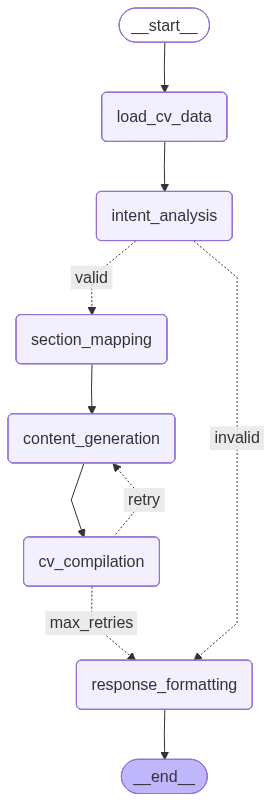

In [13]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
# Run the graph
result = app.invoke(
    {
        "user_request": "Create a CV tailored for a Senior Data Engineer position at a tech company",
        "cv_data_source": "data/my_cv_data.json",
        "word_template_path": "templates/modern_cv_template.docx",
        "target_job_description": "Senior Data Engineer with Azure, Python, and distributed systems experience...",
    }
)

print(result["response_formatting"].final_response)
